# Exercise 3

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import pickle
import platform
import os
import numpy as np
from numpy.ma import exp
from skimage.transform import resize

In [3]:
df_excel=pd.read_excel(r'ETHUSDT-5m-2022-01.xlsx')
lookback=50
lookforward=10

#creating empty lists to store lists from inside
list_Open=[]
list_High=[]
list_Low=[]
list_Close=[]
list_Volume=[]
list_RSI=[]
list_Signal=[] #0 for no change, 1 for 0.5%up, 2 for 1%up, 3 for 0.5%down, 4 for 1%down


i=lookback
while i+lookforward<len(df_excel.Close):
    closing_val=df_excel.Close[i] #check the index if working normal
    value_above_half=1.005*closing_val
    value_above_full=1.01*closing_val
    value_below_half=0.995*closing_val
    value_below_full=0.99*closing_val
    
    
    stay=True
    j=i+1
    while (j<=i+lookforward) and stay==True:
        #main if to see if we went above or below half percent
        if df_excel.Close[j]>=value_above_half or df_excel.Close[j]<=value_below_half:
 
            #if we went half percent above
            if df_excel.Close[j]>=value_above_half:
            
                #Adding data to required lists
                list_Signal.append(1)
                list_Open.append(df_excel.Open[i-lookback:i].tolist())
                list_High.append(df_excel.High[i-lookback:i].tolist())
                list_Low.append(df_excel.Low[i-lookback:i].tolist())
                list_Close.append(df_excel.Close[i-lookback:i].tolist())
                list_Volume.append(df_excel.Volume[i-lookback:i].tolist())
                
                #loop to see if we went further up to 1 percent, or dropped back to entry
                while (j<=i+lookforward):
                    if df_excel.Close[j]>=value_above_full:
                        
                        #Adding data to required lists
                        list_Signal.append(2)
                        list_Open.append(df_excel.Open[i-lookback:i].tolist())
                        list_High.append(df_excel.High[i-lookback:i].tolist())
                        list_Low.append(df_excel.Low[i-lookback:i].tolist())
                        list_Close.append(df_excel.Close[i-lookback:i].tolist())
                        list_Volume.append(df_excel.Volume[i-lookback:i].tolist())
                        
                        stay=False
                        break
                    elif df_excel.Low[j]<=closing_val: #using Low value here because it will hit stop loss
                        stay=False
                        break
                    j=j+1
                break
            
            
            #if we went half percent below
            if df_excel.Close[j]<=value_below_half:
                
                #Adding data to required lists
                list_Signal.append(3)
                list_Open.append(df_excel.Open[i-lookback:i].tolist())
                list_High.append(df_excel.High[i-lookback:i].tolist())
                list_Low.append(df_excel.Low[i-lookback:i].tolist())
                list_Close.append(df_excel.Close[i-lookback:i].tolist())
                list_Volume.append(df_excel.Volume[i-lookback:i].tolist())
                
                #loop to see if we went further down to -1 percent, or rose back to entry
                while (j<=i+lookforward):
                    if df_excel.Close[j]<=value_below_full:
                        
                        #Adding data to required lists
                        list_Signal.append(4)
                        list_Open.append(df_excel.Open[i-lookback:i].tolist())
                        list_High.append(df_excel.High[i-lookback:i].tolist())
                        list_Low.append(df_excel.Low[i-lookback:i].tolist())
                        list_Close.append(df_excel.Close[i-lookback:i].tolist())
                        list_Volume.append(df_excel.Volume[i-lookback:i].tolist())

                        stay=False
                        break
                    elif df_excel.High[j]>=closing_val: #using High value here because it will hit stop loss
                        stay=False
                        break
                    j=j+1
                break
        
        j=j+1
        if j==i+lookforward+1:
            
            #Adding data to required lists
            list_Signal.append(0)
            list_Open.append(df_excel.Open[i-lookback:i].tolist())
            list_High.append(df_excel.High[i-lookback:i].tolist())
            list_Low.append(df_excel.Low[i-lookback:i].tolist())
            list_Close.append(df_excel.Close[i-lookback:i].tolist())
            list_Volume.append(df_excel.Volume[i-lookback:i].tolist())
            
    i=i+1     

In [4]:
list_Open=np.array(list_Open)
list_High=np.array(list_Open)
list_Low=np.array(list_Low)
list_Close=np.array(list_Close)
list_Volume=np.array(list_Volume)
list_RSI=np.array(list_RSI)
list_Signal=np.array(list_Signal)
total_data=np.concatenate((list_Open,list_High,list_Low,list_Close,list_Volume),axis=1)

In [8]:
total_data.shape

(10502, 250)

In [2]:
def cifar_10_naivebayes_learn(Xp, Y):
    
    df=pd.DataFrame(Xp)
    df[len(df.columns)]=pd.DataFrame(Y)
   
    mu = np.array(df.groupby(len(df.columns)-1).mean())
    sigma = np.array(df.groupby(len(df.columns)-1).std())
    prior = np.array(df.groupby(len(df.columns)-1).size().div(len(df))).reshape(10,1)   
    
    return (mu,sigma,prior)


In [11]:
def cfar_10_bayes_learn(Xf,Y):
   
    df=pd.DataFrame(Xf)
    df[len(df.columns)]=pd.DataFrame(Y)
    mu = np.array(df.groupby(len(df.columns)-1).mean())
    sigma = np.array(df.groupby(len(df.columns)-1).cov()).reshape(5,Xf.shape[1],Xf.shape[1])
    prior = np.array(df.groupby(len(df.columns)-1).size().div(len(df))).reshape(5,1)
    
    return (mu,sigma,prior)

In [4]:
def Gaussian_pdf(x, mu, sigma):
    variance = float(sigma)**2
    denom = (2*math.pi*variance)**.5
    num = math.exp(-(float(x)-float(mu))**2/(2*variance))
    return num/denom

In [12]:
def Gaussian_multi_var(X, miu, sigma):

    if sigma.shape != (miu.size, miu.size):
        print("Wrong dimensions")
    else:
        
        X = X.reshape(1, -1)
        miu = miu.reshape(1, -1)
        numerator = exp((-1/2)*((X-miu) @ np.linalg.inv(sigma) @ np.transpose((X-miu))))
        sign, log = np.linalg.slogdet(sigma)
        denominator = (pow(2*np.pi, miu.size/2) * np.sqrt(sign*np.exp(log/5)))
        return np.array(numerator/denominator)
        
            

        

In [6]:
def cifar10_classifier_naivebayes(x,mu,sigma,p):
    pred=np.empty((10,1))
    for classes in range(0,10):
        numerator = Gaussian_pdf(x[0],mu[classes][0],sigma[classes][0])*Gaussian_pdf(x[1],mu[classes][1],sigma[classes][1])*Gaussian_pdf(x[2],mu[classes][2],sigma[classes][2])*p[classes]
        denom =0
        for j in range(0,10):
            denom += Gaussian_pdf(x[0],mu[j][0],sigma[j][0])*Gaussian_pdf(x[1],mu[j][1],sigma[j][1])*Gaussian_pdf(x[2],mu[j][2],sigma[j][2])*p[j]
        
        pred[classes]=numerator/denom         
                             
    return np.argmax(pred)

In [16]:
def cifar10_classifier_bayes(x,mu,sigma,p):
    pred=np.empty((5,1))
    for classes in range(0,5):
        numerator = Gaussian_multi_var(x,mu[classes],sigma[classes])*p[classes]
        denom = 0
        for j in range(0,5):
            denom+=Gaussian_multi_var(x,mu[j],sigma[j])*p[j]
        
        pred[classes]=numerator/denom
        
    
    return np.argmax(pred)
        

In [8]:
def cfar10_color(X):
    Xp = np.empty((X.shape[0], 3))
    for idx, image in enumerate(X):
        Xp[idx] = resize(image, (1, 1)).flatten()
        
    return Xp


In [9]:
def cfar10_xXx_color(X,shape):
    Xp = np.empty((X.shape[0], shape*shape*3))
    for idx, image in enumerate(X):
        Xp[idx] = resize(image, (shape, shape)).flatten()
        
    return Xp


In [14]:
def class_acc(pred, gt):
    true = 0

    for labels in zip(pred, gt):
        if labels[0] == labels[1]:
            true += 1

    return (true/len(gt))*100



In [11]:
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("int32")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [20]:
X,Y,Xt,Yt = load_CIFAR10(r'./cifar-10-python/cifar-10-batches-py/')

In [21]:
X.shape

(50000, 32, 32, 3)

In [26]:

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict


#datadict = unpickle('/home/kamarain/Data/cifar-10-batches-py/data_batch_1')
datadict = unpickle(
    r'E:/Data/University/ML.DATA.100/Exercise 2/cifar-10-python/cifar-10-batches-py/data_batch_1')

X = datadict["data"]
Y = datadict["labels"]
X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("int32")
Y = np.array(Y)

labeldict = unpickle(
    r'E:/Data/University/ML.DATA.100/Exercise 2/cifar-10-python/cifar-10-batches-py/batches.meta')
label_names = labeldict["label_names"]


In [9]:
image_size =[]
accuracy = []

# Naive Bayes Classifier 1x1

In [25]:
X_1x1 = cfar10_xXx_color(X,1)
Xt_1x1 = cfar10_xXx_color(Xt,1)
mu,sigma,p = cifar_10_naivebayes_learn(X_1x1,Y)
preds = [cifar10_classifier_naivebayes(x,mu,sigma,p) for x in Xt_1x1]

image_size.append((1,1))
accuracy.append(class_acc(preds,Yt))

print("Naive Bayes Accuracy: ",class_acc(preds,Yt))

Naive Bayes Accuracy:  19.54


# Bayes Classifier 1x1 

In [23]:

mu,sigma,p = cfar_10_bayes_learn(X_1x1,Y)
preds = [cifar10_classifier_bayes(x,mu,sigma,p) for x in Xt_1x1]

image_size.append((1,1))
accuracy.append(class_acc(preds,Yt))
print("Bayes Accuracy 1x1: ",class_acc(preds,Yt))

NameError: name 'X_1x1' is not defined

# Bayes Classifier crypto



In [18]:
# X_2x2 = cfar10_xXx_color(X,2)
# Xt_2x2 = cfar10_xXx_color(Xt,2)
mu,sigma,p = cfar_10_bayes_learn(total_data,list_Signal)
preds = [cifar10_classifier_bayes(x,mu,sigma,p) for x in total_data]

#image_size.append((2,2))
#accuracy.append(class_acc(preds,list_Signal))
print("Bayes Accuracy for crypto: ",class_acc(preds,list_Signal))

s:\Data\Softwares\Anaconda3\lib\site-packages\numpy\ma\core.py:944: RuntimeWarning: overflow encountered in exp
  result = self.f(d, *args, **kwargs)
C:\Users\Uzair\AppData\Local\Temp/ipykernel_16712/528671311.py:11: RuntimeWarning: invalid value encountered in sqrt
  denominator = (pow(2*np.pi, miu.size/2) * np.sqrt(sign*np.exp(log/5)))
C:\Users\Uzair\AppData\Local\Temp/ipykernel_16712/405762922.py:9: RuntimeWarning: invalid value encountered in true_divide
  pred[classes]=numerator/denom


Testing

In [47]:
df=pd.DataFrame(X_2x2)
df[len(df.columns)]=pd.DataFrame(Y)
mu = np.array(df.groupby(len(df.columns)-1).mean())
# df[len(df.columns)]=pd.DataFrame(Y)
# mu = np.array(df.groupby(len(df.columns)-1).mean())
# sigma = np.array(df.groupby(len(df.columns)-1).cov()).reshape(10,Xf.shape[1],Xf.shape[1])
# prior = np.array(df.groupby(len(df.columns)-1).size().div(len(df))).reshape(10,1)
    

In [54]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5.913898e-08,4.167669e-08,2.526212e-08,6.239861e-08,4.528556e-08,2.805609e-08,7.241033e-08,5.378388e-08,3.224704e-08,6.775372e-08,5.273614e-08,3.085006e-08,6
1,6.426126e-08,6.845221e-08,7.287599e-08,6.414484e-08,6.309710e-08,5.774200e-08,5.867332e-08,5.925540e-08,6.309710e-08,5.448237e-08,5.122274e-08,4.889444e-08,9
2,9.185169e-08,9.161886e-08,9.010546e-08,8.067582e-08,7.892959e-08,7.706694e-08,4.074536e-08,4.260801e-08,4.144385e-08,3.282912e-08,3.562309e-08,3.562309e-08,9
3,4.260801e-08,3.539026e-08,2.398156e-08,4.540198e-08,3.830064e-08,2.654269e-08,4.970934e-08,4.074536e-08,2.805609e-08,4.901085e-08,4.074536e-08,2.828892e-08,4
4,4.400499e-08,5.331822e-08,6.286427e-08,4.470348e-08,5.424954e-08,6.658956e-08,4.610047e-08,4.528556e-08,4.516914e-08,3.399327e-08,3.539026e-08,3.899913e-08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,7.741619e-08,8.568168e-08,9.965152e-08,7.473864e-08,8.265488e-08,9.662472e-08,4.703179e-08,5.168840e-08,6.298069e-08,4.912727e-08,5.424954e-08,6.542541e-08,2
49996,9.301584e-08,7.427298e-08,3.469177e-08,9.930227e-08,8.405186e-08,3.946479e-08,9.604264e-08,6.542541e-08,2.689194e-08,9.918585e-08,7.159542e-08,2.840534e-08,6
49997,5.366746e-08,7.508788e-08,8.544885e-08,5.669426e-08,6.833579e-08,7.520430e-08,2.281740e-08,3.073364e-08,3.445894e-08,2.246816e-08,3.050081e-08,3.410969e-08,9
49998,8.859206e-08,9.324867e-08,1.001172e-07,8.451752e-08,8.940697e-08,9.639189e-08,6.624032e-08,6.658956e-08,6.717164e-08,6.181654e-08,6.426126e-08,6.635673e-08,1


# Bayes Classifier 4x4

In [28]:
X_4x4 = cfar10_xXx_color(X,4)
Xt_4x4 = cfar10_xXx_color(Xt,4)
mu,sigma,p = cfar_10_bayes_learn(X_4x4,Y)
preds = [cifar10_classifier_bayes(x,mu,sigma,p) for x in Xt_4x4]

image_size.append((4,4))
accuracy.append(class_acc(preds,Yt))
print("Bayes Accuracy 4x4: ",class_acc(preds,Yt))

Bayes Accuracy 4x4:  44.05


# Bayes Classifier 5x5

In [30]:
X_5x5 = cfar10_xXx_color(X,5)
Xt_5x5 = cfar10_xXx_color(X,5)
mu,sigma,p = cfar_10_bayes_learn(X_5x5,Y)
preds = [cifar10_classifier_bayes(x,mu,sigma,p) for x in Xt_5x5]

image_size.append((5,5))
accuracy.append(class_acc(preds,Yt))
print("Bayes Accuracy 5x5: ",class_acc(preds,Yt))

Bayes Accuracy 5x5:  54.74


# Bayes Classifier 10x10

In [36]:
X_10x10 = cfar10_xXx_color(X,10)
Xt_10x10 = cfar10_xXx_color(X,10)
mu,sigma,p = cfar_10_bayes_learn(X_10x10,Y)
preds = [cifar10_classifier_bayes(x,mu,sigma,p) for x in Xt_10x10]

image_size.append((10,10))
accuracy.append(class_acc(preds,Yt))
print("Bayes Accuracy 10x10: ",class_acc(preds,Yt))

Bayes Accuracy 10x10:  75.64999999999999


# Accuracy vs Window Size Graph

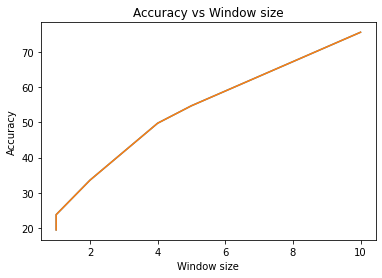

In [60]:
plt.plot(image_size,accuracy)
plt.title('Accuracy vs Window size')
plt.xlabel('Window size')
plt.ylabel('Accuracy')
plt.show()
